In [ ]:
import pandas as pd

# Load the dataset
file_path = 'water_potability_cleaned.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
# Generate summary statistics for the dataset
statsdescription = df.describe()
statsdescription


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
# Check for missing values
missingvalues = df.isnull().sum()
missingvalues


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the visualizations
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of feature names
features = df.columns[:-1]  # Exclude the target variable 'Potability'

# Loop through the features to create subplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

# Show the plots
plt.tight_layout()
plt.show()


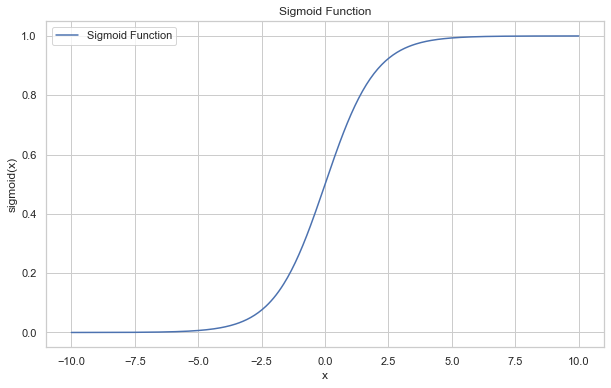

In [5]:
import numpy as np

# Define the sigmoid function
def sigmoidfunction(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of values
x_values = np.linspace(-10, 10, 400)
y_values = sigmoidfunction(x_values)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()


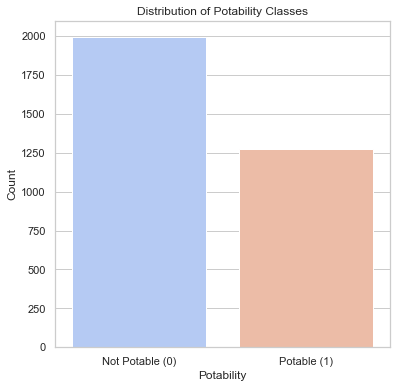

Potability
0    1998
1    1278
Name: count, dtype: int64

In [6]:
# Count the distribution of 'Potability' classes
class_distribution = df['Potability'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='coolwarm')
plt.title('Distribution of Potability Classes')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Potable (0)', 'Potable (1)'])
plt.show()

# Show the actual counts
class_distribution


In [ ]:
# The dataset is somewhat imbalanced, with more samples labeled as "Not Potable" compared to those labeled as "Potable"

In [ ]:
# Applying filter wrapper hybrid
# Filter : chi square
# wrapper : 

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate features and target variable
X = df.drop('Potability', axis=1)
y = df['Potability']

# Apply SelectKBest class to extract the top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X, y)

# Get the scores for each feature
chi2_scores = pd.DataFrame(fit.scores_)
chi2_columns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization
feature_scores = pd.concat([chi2_columns, chi2_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Sort the features based on their scores
sorted_features = feature_scores.sort_values(by='Score', ascending=False)

sorted_features


,Feature,Score
2,Solids,13023.976277
4,Sulfate,5.377126
1,Hardness,3.451841
5,Conductivity,3.316466
6,Organic_carbon,2.258331
3,Chloramines,0.651609
7,Trihalomethanes,0.581652
0,ph,0.009088
8,Turbidity,0.001256


In [ ]:
    # Solids: Score = 13023.98
    # Sulfate: Score = 5.38
    # Hardness: Score = 3.45
    # Conductivity: Score = 3.32
    # Organic_carbon: Score = 2.26

In [11]:
# wrapper
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=42)


In [12]:
# Initialize RFE with Logistic Regression model and the desired number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE to the data
fit = rfe.fit(X, y)

# Create a DataFrame to display the features and their rankings
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': fit.ranking_,
    'Selected': fit.support_
})

# Sort the features based on their rankings
sorted_ranking = feature_ranking.sort_values(by='Ranking')

sorted_ranking


,Feature,Ranking,Selected
0,ph,1,True
3,Chloramines,1,True
4,Sulfate,1,True
6,Organic_carbon,1,True
8,Turbidity,1,True
7,Trihalomethanes,2,False
1,Hardness,3,False
5,Conductivity,4,False
2,Solids,5,False


In [ ]:
 # Sulfate and Organic_carbon.

In [21]:
from sklearn.model_selection import train_test_split

# Extract the relevant features and the target variable
features = ['Sulfate', 'Organic_carbon']
X = df[features]
y = df['Potability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2620, 2), (656, 2), (2620,), (656,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Initialize variables to hold performance metrics and computational time
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': [],
    'Cross-Validation Mean': [],
    'Computational Time (s)': []
}

# Perform model training and evaluation
for model_name, model in models.items():
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Perform k-fold cross-validation
    cross_val_mean = cross_val_score(model, X, y, cv=5).mean()
    
    # Record computational time
    elapsed_time = time.time() - start_time
    
    # Store metrics
    performance_metrics['Model'].append(model_name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)
    performance_metrics['ROC AUC'].append(roc_auc)
    performance_metrics['Cross-Validation Mean'].append(cross_val_mean)
    performance_metrics['Computational Time (s)'].append(elapsed_time)

# Convert the metrics to a DataFrame for easier visualization
performance_df = pd.DataFrame(performance_metrics)

performance_df


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross-Validation Mean,Computational Time (s)
0,Logistic Regression,0.628049,0.000000,0.000000,0.000000,0.524371,0.609890,0.083184
1,SVM,0.628049,0.500000,0.004098,0.008130,0.583330,0.608363,7.979287
2,Random Forest,0.571646,0.407960,0.336066,0.368539,0.535856,0.554944,2.878756
3,Naive Bayes,0.641768,0.561644,0.168033,0.258675,0.579659,0.615379,0.022724


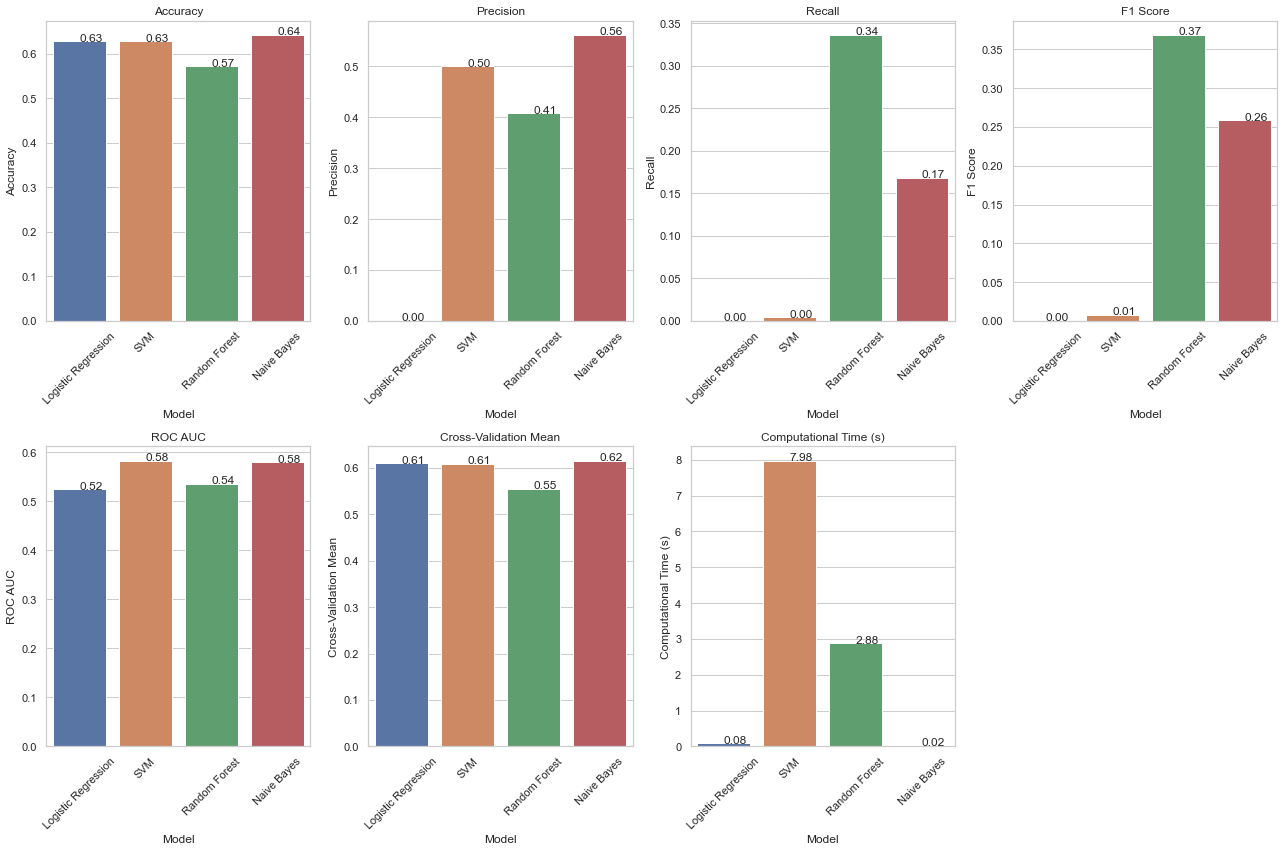

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 12))

# Create subplots for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Cross-Validation Mean', 'Computational Time (s)']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 4, i)
    sns.barplot(x='Model', y=metric, data=performance_df)
    plt.title(metric)
    plt.xticks(rotation=45)
    for index, value in enumerate(performance_df[metric]):
        plt.text(index, value, f'{value:.2f}')

plt.tight_layout()
plt.show()


In [ ]:
# For all features 

In [24]:
# Extract all relevant features and the target variable
all_features = df.columns.tolist()
all_features.remove('Potability')
X_all = df[all_features]
y_all = df['Potability']

# Split the data into training and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Initialize variables to hold performance metrics and computational time for all features
performance_metrics_all = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': [],
    'Cross-Validation Mean': [],
    'Computational Time (s)': []
}

# Perform model training and evaluation using all features
for model_name, model in models.items():
    start_time = time.time()
    
    # Train the model
    model.fit(X_train_all, y_train_all)
    
    # Make predictions on test set
    y_pred_all = model.predict(X_test_all)
    y_prob_all = model.predict_proba(X_test_all)[:, 1]
    
    # Compute performance metrics
    accuracy_all = accuracy_score(y_test_all, y_pred_all)
    precision_all = precision_score(y_test_all, y_pred_all)
    recall_all = recall_score(y_test_all, y_pred_all)
    f1_all = f1_score(y_test_all, y_pred_all)
    roc_auc_all = roc_auc_score(y_test_all, y_prob_all)
    
    # Perform k-fold cross-validation
    cross_val_mean_all = cross_val_score(model, X_all, y_all, cv=5).mean()
    
    # Record computational time
    elapsed_time_all = time.time() - start_time
    
    # Store metrics
    performance_metrics_all['Model'].append(model_name)
    performance_metrics_all['Accuracy'].append(accuracy_all)
    performance_metrics_all['Precision'].append(precision_all)
    performance_metrics_all['Recall'].append(recall_all)
    performance_metrics_all['F1 Score'].append(f1_all)
    performance_metrics_all['ROC AUC'].append(roc_auc_all)
    performance_metrics_all['Cross-Validation Mean'].append(cross_val_mean_all)
    performance_metrics_all['Computational Time (s)'].append(elapsed_time_all)

# Convert the metrics to a DataFrame for easier visualization
performance_df_all = pd.DataFrame(performance_metrics_all)

performance_df_all


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross-Validation Mean,Computational Time (s)
0,Logistic Regression,0.628049,0.000000,0.000000,0.000000,0.519925,0.609890,0.172407
1,SVM,0.628049,0.000000,0.000000,0.000000,0.486690,0.609890,7.871785
2,Random Forest,0.673780,0.597403,0.377049,0.462312,0.687162,0.640728,5.289919
3,Naive Bayes,0.628049,0.500000,0.213115,0.298851,0.609422,0.611417,0.021727


In [ ]:
# As this dataset is the subset hence data is not properly distributed in this case .

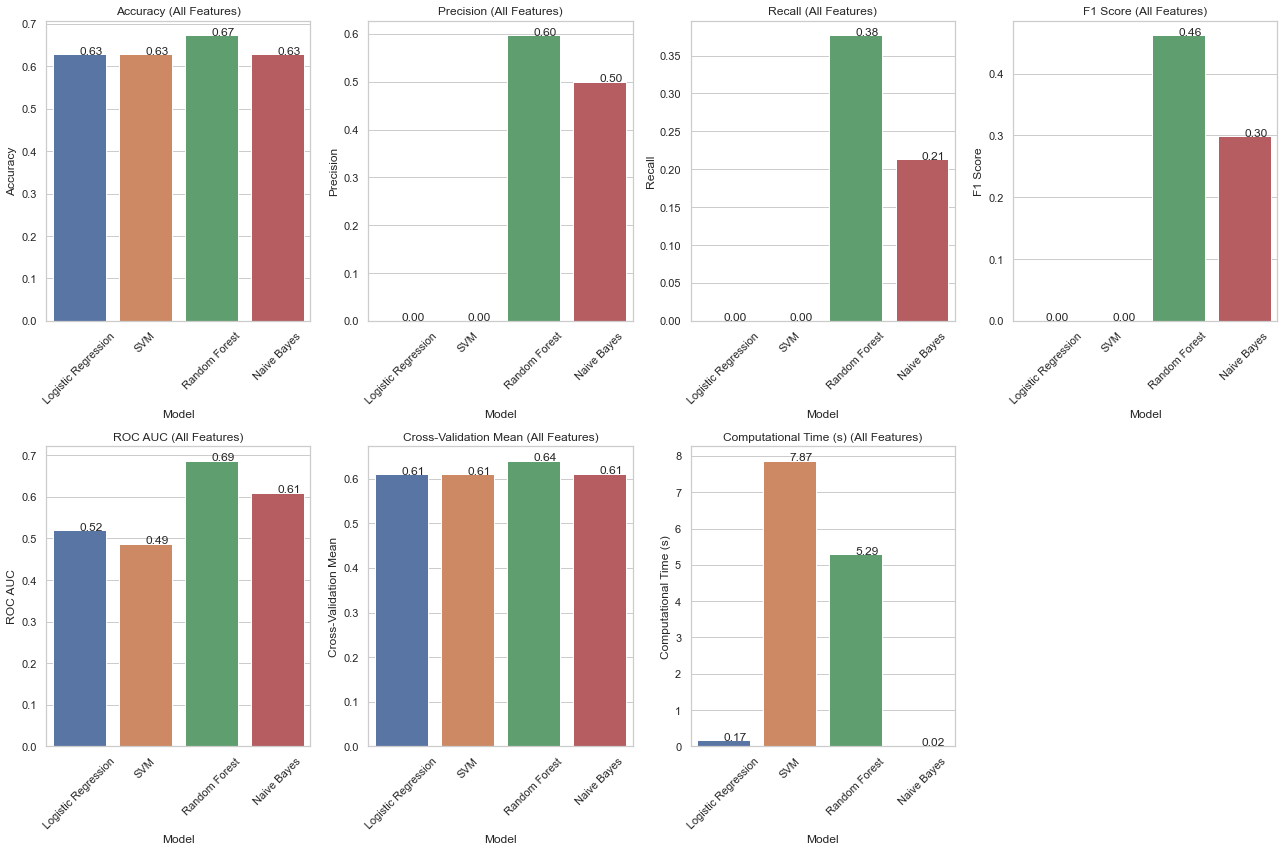

In [25]:
# Initialize the figure for all features
plt.figure(figsize=(18, 12))

# Create subplots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 4, i)
    sns.barplot(x='Model', y=metric, data=performance_df_all)
    plt.title(metric + ' (All Features)')
    plt.xticks(rotation=45)
    for index, value in enumerate(performance_df_all[metric]):
        plt.text(index, value, f'{value:.2f}')

plt.tight_layout()
plt.show()
